In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, IntSlider
%matplotlib widget

def extract_from_txt(file_path, labels, delimiter='\n'):
    with open(file_path, 'r') as file:
        lines = file.readlines()
    data_dict = {label: [] for label in labels}
    last_delimiter_index = 0
    messages = []
    for i in range(len(lines)):
        if(lines[i].startswith(delimiter)):
            messages.append(lines[last_delimiter_index:i])
            last_delimiter_index = i
    for message in messages:
        message_dict = {label: [] for label in labels}
        for label in labels:
            for line in message:
                    if(line.startswith(label)):
                        message_dict[label].append(float(line.split(':')[1]))
        full = True
        for key in message_dict:
            if(len(message_dict[key]) == 0):
                full=False
                break
        if(full):
            for label in labels:
                data_dict[label].append(message_dict[label][0])

    # for series in data_dict:
    #     print(series, len(data_dict[series]))

    df_raw = pd.DataFrame(data_dict)
    return df_raw

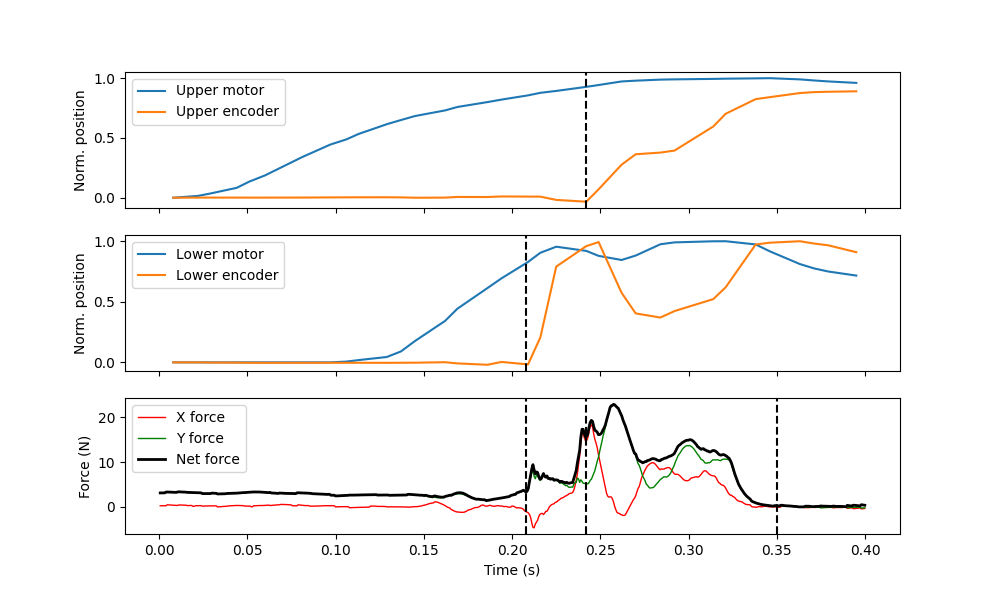

In [6]:
starttime = 74.15
period = 0.4
offset = 6.1-0.16+0.005

df_force = extract_from_txt(
    "./force_2024-05-10_10-31-20.txt", 
    [
        'elapsed', 
        'N23', 
        'N67'
    ],
    '\n'
)
dt = 0.662
elapsed = np.arange(0, dt*len(df_force[f'N23']), dt)/1000 - starttime
df_force.loc[:,'t'] = elapsed
df_force['Fx'] = -df_force['N23']
df_force['Fy'] = df_force['N67']
df_force = df_force[df_force['t'] > 0]
df_force = df_force[df_force['t'] < period]
df_force = df_force.reset_index()


df_log = extract_from_txt(
    "./log_2024-05-10_10-30-05.txt", 
    [
        't',
        'p1',
        'p2',
        'm1',
        'm2',
        'e1', 
        'e2', 
        'I'
    ],
    '#'
)
df_log.loc[:,'t'] = (df_log['t'] - df_log['t'][0])/1000 -starttime + offset
df_log = df_log[df_log['t'] > 0]
df_log = df_log[df_log['t'] < period]
df_log = df_log.reset_index()


plt.close('all')

vlines = [0.208, 0.2418, 0.35]


fig, axs = plt.subplots(3, 1, figsize=(10,6), sharex=True)
# fig.tight_layout()

axs[0].plot(df_log['t'], (df_log['m1'] - df_log['m1'][0])/max(abs(df_log['m1'] - df_log['m1'][0])), '-', label='Upper motor')
axs[0].plot(df_log['t'], -(df_log['e2'] - df_log['e2'][0])/max(abs(df_log['e2'])), '-', label='Upper encoder')
axs[0].axvline(x=vlines[1], color='k', linestyle='--')
axs[0].set_ylabel('Norm. position')

axs[1].plot(df_log['t'], -(df_log['m2'] - df_log['m2'][0])/max(abs(df_log['m2'] - df_log['m2'][0])), '-', label='Lower motor')
axs[1].plot(df_log['t'], (df_log['e1'] - df_log['e1'][0])/max(abs(df_log['e1'] - df_log['e1'][0])), '-', label='Lower encoder')
axs[1].axvline(x=vlines[0], color='k', linestyle='--')
axs[1].set_ylabel('Norm. position')

axs[2].plot(df_force['t'], df_force['Fx'], 'r', label='X force', linewidth=1)
axs[2].plot(df_force['t'], df_force['Fy'], 'g', label='Y force', linewidth=1)
axs[2].plot(df_force['t'], np.sqrt(df_force['Fx']**2 + df_force['Fy']**2), 'black', label='Net force', linewidth=2)
axs[2].set_ylabel('Force (N)')
axs[2].set_xlabel("Time (s)")
for vline in vlines:
    axs[2].axvline(x=vline, color='k', linestyle='--')

for ax in axs:
    ax.legend(loc='upper left')


In [55]:
df_force

,index,elapsed,N23,N67,t,Fx,Fy
0,111783,2338823.0,-0.062417,2.961997,0.000346,-0.062417,2.961997
1,111784,2338824.0,-0.066377,2.962298,0.001008,-0.066377,2.962298
2,111785,2338825.0,-0.067654,2.962704,0.001670,-0.067654,2.962704
3,111786,2338825.0,-0.067604,2.964966,0.002332,-0.067604,2.964966
4,111787,2338826.0,-0.066434,2.966647,0.002994,-0.066434,2.966647
...,...,...,...,...,...,...,...
1506,113289,2339820.0,0.019006,-0.060929,0.997318,0.019006,-0.060929
1507,113290,2339821.0,0.020396,-0.060055,0.997980,0.020396,-0.060055
1508,113291,2339822.0,0.021182,-0.055976,0.998642,0.021182,-0.055976
1509,113292,2339822.0,0.021804,-0.049699,0.999304,0.021804,-0.049699
